In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import cm

In [3]:
# Dataset vgchartz-2024

vgchartz_data = pd.read_csv('vgchartz-2024.csv')
vgchartz_data.info()
vgchartz_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
5,/games/boxart/full_call-of-duty-modern-warfare...,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.7,14.82,9.07,0.13,4.29,1.33,2011-11-08,NaN
6,/games/boxart/full_call-of-duty-black-ops_5Ame...,Call of Duty: Black Ops,X360,Shooter,Activision,Treyarch,8.8,14.74,9.76,0.11,3.73,1.14,2010-11-09,NaN
7,/games/boxart/full_4653215AmericaFrontccc.jpg,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13.94,5.26,0.21,6.21,2.26,2018-10-26,2018-11-02
8,/games/boxart/full_1977964AmericaFrontccc.jpg,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.4,13.86,8.27,0.07,4.32,1.20,2012-11-13,2018-04-07
9,/games/boxart/full_4649679AmericaFrontccc.png,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,8.0,13.80,4.99,0.65,5.88,2.28,2012-11-13,2018-04-07


АНАЛИТИКА:

In [ ]:
# Очистка даты релиза 31-12-... и 01-01-... (Возможно удалить строки после 1999 года, их около 1000)
data = pd.read_csv('vgchartz-2024.csv')
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')


filtered_data = data[
    (data['release_date'].dt.strftime('%m-%d').isin(['12-31', '01-01']))
].sort_values(by='release_date')
pd.set_option('display.max_rows', None)
print(filtered_data[['title', 'console', 'release_date']])


                                                   title console release_date
59673                                        Pong Sports    2600   1977-01-01
46763                                  Race: Auto Racing    2600   1977-01-01
1102                                              Combat    2600   1977-01-01
33029                                         Basic Math    2600   1977-01-01
26265                                            Kingdom      PC   1977-01-01
20694                                   Fun With Numbers    2600   1977-01-01
1532                                      Air-Sea Battle    2600   1977-01-01
3744               Maze Craze: A Game of Cops 'n Robbers    2600   1978-01-01
8395                                            Home Run    2600   1978-01-01
58392                                            Bowling    2600   1978-01-01
22559                                           Surround    2600   1978-01-01
5766                                        Flag Capture    2600

Список графиков: (Продажи - количсетво проданных копий)
1. Топ 10 издателей по продажам на ps 4
2. Кол-во продаж по регионам
3. Кол-во продаж по консолям
4. Топ 5 разработчиков по продажам на всех платформах
5. Сравнение топ 10 жанров (по продажам) на двух рахных платформах (PC and PS4)
6. Топ-10 самых продаваемых игр
 (правки) 7. Кол-во релизов видеоигр по месяца (за все время)
 
! 8. Продажи по жанрам с течением времени (Топ-5 жанров с 2000 по 2020)
9. Оценка игр по платформам
10. Корреляция между оценками и продажами
11. Количество продаж (млн) топ 10 платформ с течением времени
12. Продажи по жанрам и регионам (heatmap)
13. Продажи по жанрам (piechart)
?14. Распределение оценок по жанрам (подумать над выводом)
15. Продажи по Топ-5 жанрам (2000-2020)(Barplot)

(запас) 16. Распределение критических оценок по жанрам(Boxplot)


Идеи для кластеризации:

	1.	Кластеризация игр по типам продаж (по регионам)
Вы можете провести кластеризацию игр в зависимости от их продаж в разных регионах (NA_sales, JP_sales, PAL_sales, Other_sales). Это позволит выделить группы игр, которые успешны в определенных регионах, что может быть полезно для дальнейшего анализа предпочтений пользователей по регионам.
	2.	Кластеризация игр по жанрам и платформам
Кластеризация по жанрам и платформам может показать, какие жанры наиболее популярны на различных устройствах. Например, вы можете выделить группы для экшен-игр, ролевых игр и стратегий на разных консолях, чтобы увидеть, какие жанры привлекают больше всего игроков на PS4 и PC.
	3.	Кластеризация по критическому рейтингу и объему продаж
Проведите кластеризацию по критическому рейтингу (critic_score) и общим продажам (total_sales), чтобы выделить игры, которые имеют хорошие отзывы, но не всегда могут похвастаться высокими продажами. Это поможет понять, что влияет на коммерческий успех, кроме критических оценок.

Выводы для готовых графиков:

1. Топ 10 издателей по продажам на PS4
	•	Вывод: Из этого графика можно увидеть, какие издатели наиболее успешны на платформе PS4, их вклад в продажи и популярность игр. 

2. Количество продаж по регионам
	•	Вывод: Этот график позволяет проанализировать, какие регионы (Северная Америка, Япония, Европа и другие) являются основными рынками для видеоигр.

3. Количество продаж по консолям
	•	Вывод: Здесь видно, какие игровые платформы занимают лидерские позиции по продажам.

4. Топ 5 разработчиков по продажам на всех платформах
	•	Вывод: Этот график поможет выявить наиболее прибыльных разработчиков.

5. Сравнение топ-10 жанров по продажам на двух разных платформах (PC и PS4)
	•	Вывод: Это сравнение позволяет увидеть, какие жанры наиболее популярны на различных платформах. Этот график также показывает различия в предпочтениях игроков на разных платформах.

6. Топ-10 самых продаваемых игр
	•	Вывод: Этот график демонстрирует, какие игры стали наиболее успешными по продажам за все время.

! 7. Количество релизов видеоигр по месяцам (за все время)
	•	Вывод: Этот график показывает, как часто выходили новые игры в разные месяцы. Можно заметить пики в выходе игр, например, в праздничные сезоны (ноябрь, декабрь), а также в периоды релизов крупных игровых событий и выставок.

! 8. Продажи по топ-5 жанрам с 2000 по 2020
	•	Вывод: График позволяет увидеть, какие жанры были наиболее прибыльными в определенный период (с 2000 по 2020 год). Это может показать, какие тренды наблюдаются в индустрии видеоигр.

9. Средний рейтинг игр по платформам
	•	Вывод: Этот график поможет понять, какие платформы получают более высокие оценки от критиков.

10. Корреляция между рейтингом и количеством продаж
	•	Вывод: Здесь можно наблюдать, насколько сильно влияние рейтинга на коммерческий успех игры. Если корреляция положительная, это может свидетельствовать о том, что высокие оценки критиков способствуют повышению продаж. Однако, если корреляция слабая или отрицательная, это может показывать, что продажи не всегда зависят от рейтинга.

11. Изменение продаж на платформах с течением времени (Топ-10 платформ)
	•	Вывод: Этот график позволяет проанализировать рост или спад продаж на платформах.

! 12. Продажи по жанрам и регионам (heatmap)
	•	Вывод: Тепловая карта позволяет увидеть, какие жанры наиболее популярны в разных регионах. Например, можно выявить, что в Европе популярны спортивные игры, а в Японии — ролевые и файтинги.

13. Распределение продаж по жанрам (piechart)
	•	Вывод: Круговая диаграмма показывает, как распределяются продажи по жанрам.

! 14. Распределение критических оценок по жанрам (boxplot)
	•	Вывод: Boxplot показывает распределение оценок критиков по жанрам, выявляя, в каких жанрах игры получают самые высокие или самые низкие оценки. Также можно заметить жанры с большим разбросом в оценках (например, спортивные игры или экшн).

! 15. Продажи по Топ-5 жанрам (2000-2020) (Barplot)
	•	Вывод: Барплот наглядно демонстрирует продажи в самых популярных жанрах за этот период. С помощью такого графика можно наблюдать тренды и оценить, какие жанры оказывались наиболее прибыльными в течение 20 лет.

16. Распределение критических оценок по жанрам (Boxplot)
	•	Вывод: Этот график будет полезен для понимания, как разные жанры получают оценки критиков. 

                                publisher  total_sales
0                              Activision        84.29
1                         Electronic Arts        66.89
2                                 Ubisoft        62.83
3                               EA Sports        50.19
4                          Rockstar Games        33.93
5                      Bethesda Softworks        30.38
6  Warner Bros. Interactive Entertainment        26.18
7                             Square Enix        25.26
8                               2K Sports        20.97
9          Sony Interactive Entertainment        15.69


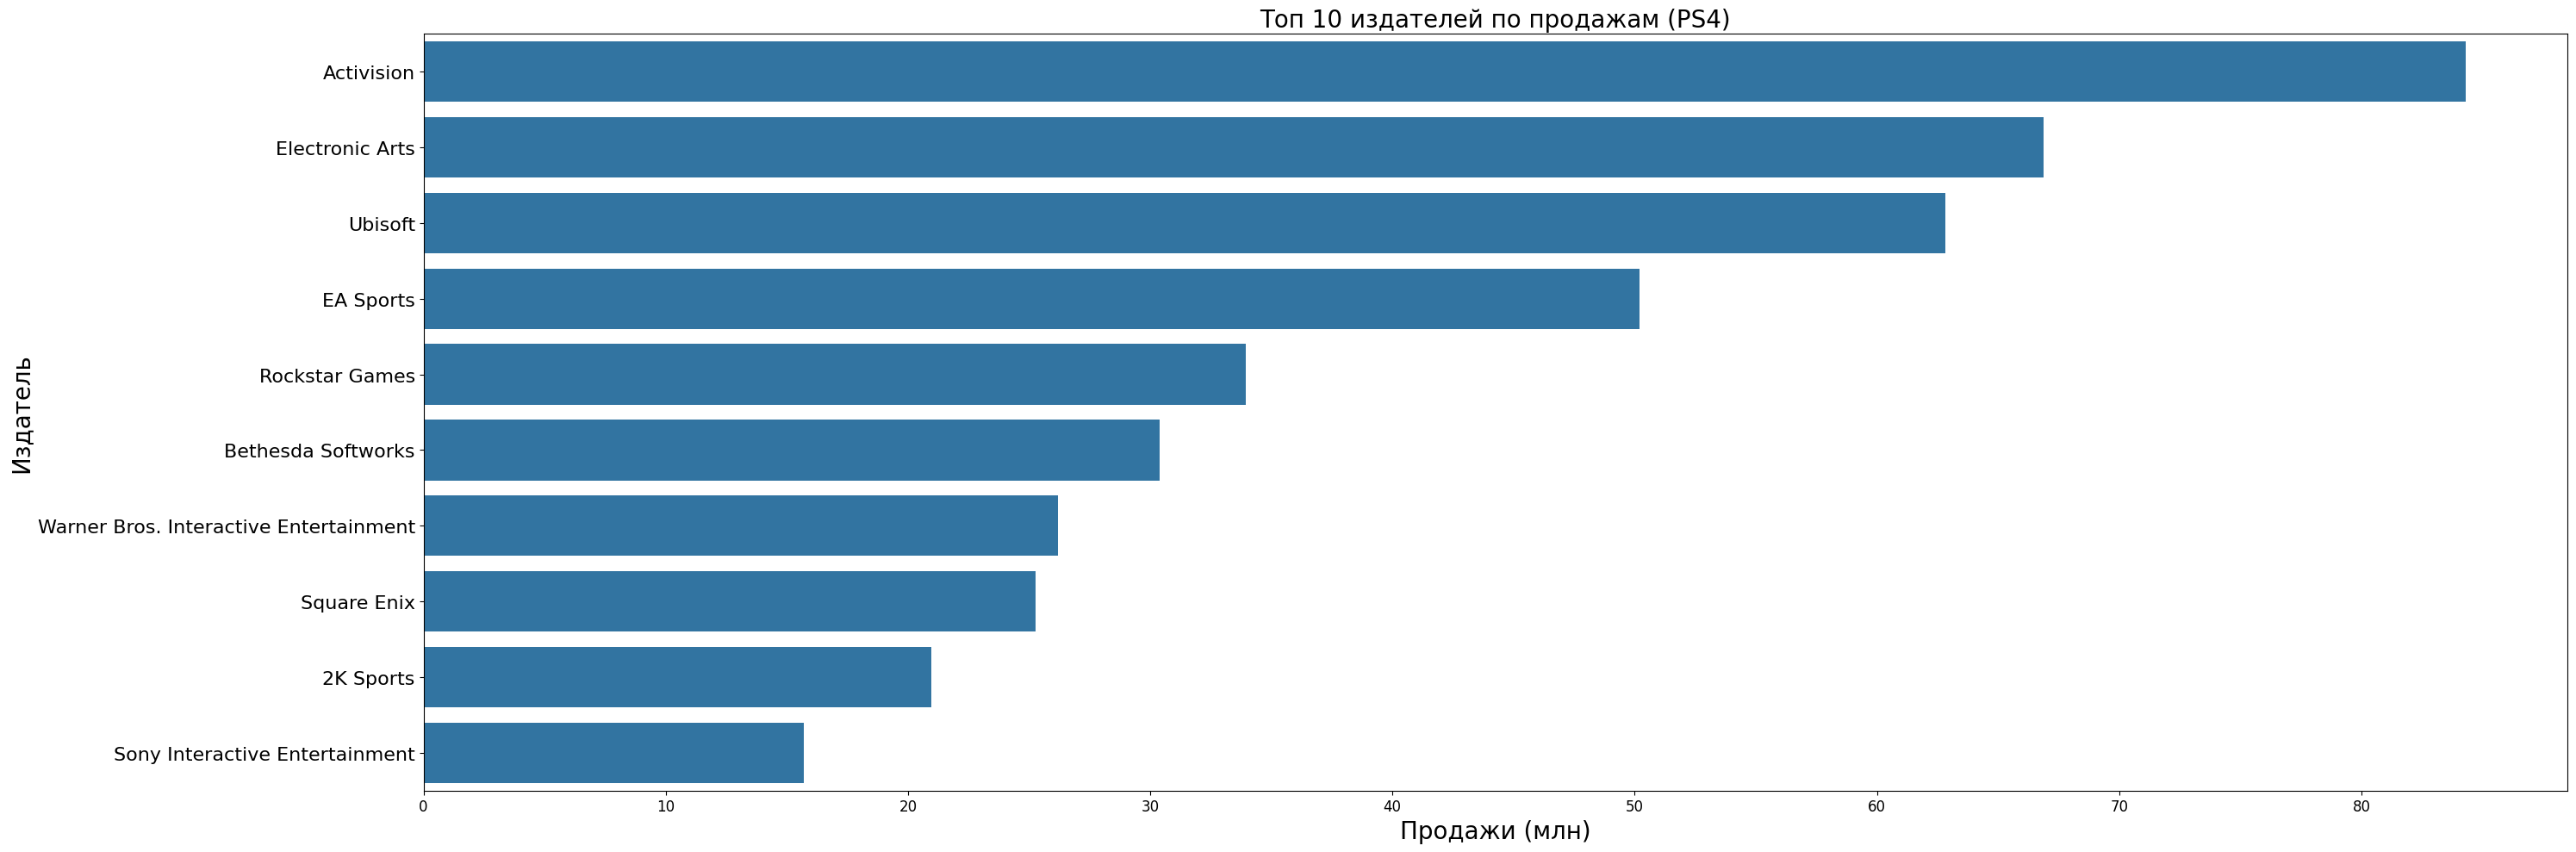

In [ ]:
#1 Топ 10 издателей по продажам на ps 4
data_1 = vgchartz_data[vgchartz_data['console'] == 'PS4']

sales_by_publisher = (data_1.groupby('publisher')['total_sales'].sum().sort_values(ascending=False)).head(10).reset_index()
print(sales_by_publisher)

plt.figure(figsize=(30,10))

sns.barplot(x='total_sales', y='publisher', data=sales_by_publisher)

plt.title('Топ 10 издателей по продажам (PS4)', fontsize=20)
plt.ylabel('Издатель', fontsize=20)
plt.xlabel('Количество проданных копий (млн)', fontsize=20)
plt.xticks(fontsize=12)  
plt.yticks(fontsize=16) 
plt.tight_layout()

plt.show()

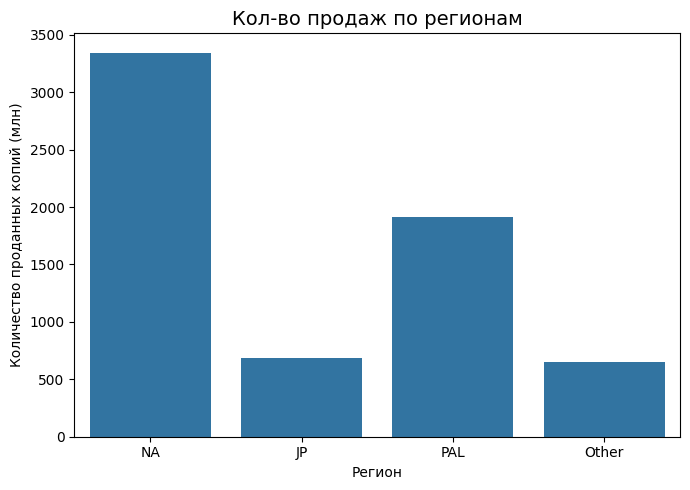

In [ ]:
#2 Кол-во продаж по регионам
region_sales = vgchartz_data[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum().reset_index()
region_sales.columns = ['Region', 'Sales']

region_names = {
    'na_sales': 'NA',
    'jp_sales': 'JP',
    'pal_sales': 'PAL',
    'other_sales': 'Other'
}
region_sales['Region'] = region_sales['Region'].map(region_names)


plt.figure(figsize=(7,5))
sns.barplot(x='Region', y='Sales', data=region_sales)
plt.title('Кол-во продаж по регионам', fontsize=14)
plt.ylabel('Количество проданных копий (млн)', fontsize=10)
plt.xlabel('Регион', fontsize=10)
plt.tight_layout()

plt.show()

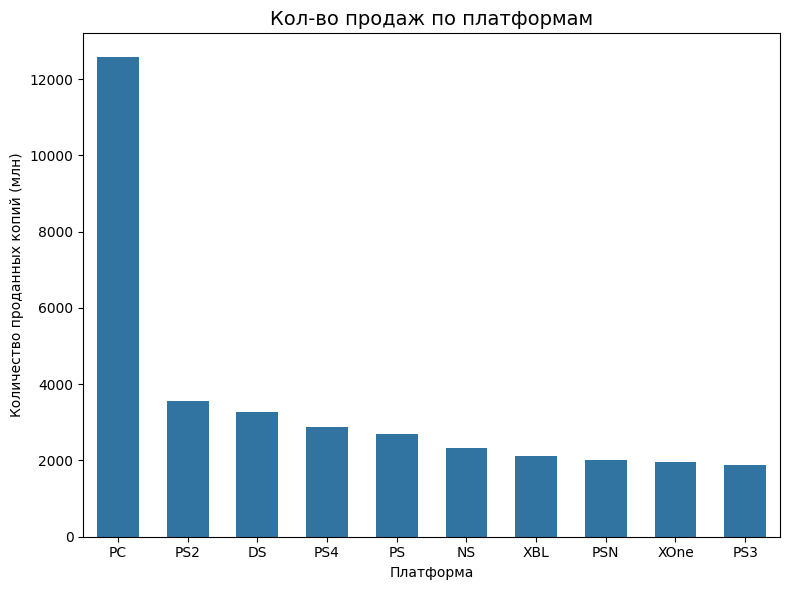

In [ ]:
#3 Кол-во продаж по консолям
games_consoles = vgchartz_data[['title', 'console']].groupby('console')['title'].nunique().sort_values(ascending=False).head(10).reset_index()
games_consoles.columns = ['Console', 'Sales']

plt.figure(figsize=(8,6))
sns.barplot(x='Console', y='Sales', data=games_consoles, width=0.6)
plt.title('Кол-во продаж по платформам', fontsize=14)
plt.ylabel('Количество проданных копий (млн)', fontsize=10)
plt.xlabel('Платформа', fontsize=10)

plt.tight_layout()
plt.show()

           developer  total_sales
0          EA Canada       275.56
1         EA Tiburon       178.33
2   Ubisoft Montreal       172.96
3           Treyarch       150.19
4  Traveller's Tales       149.55


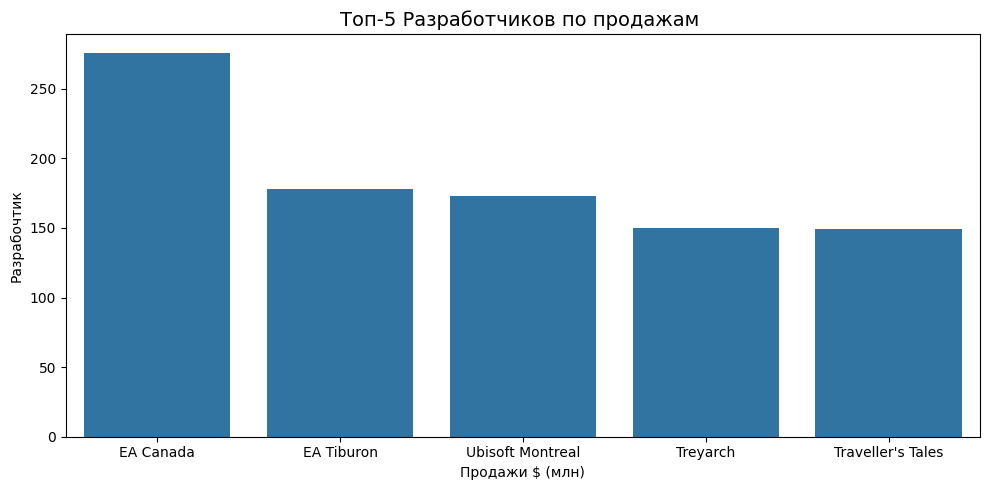

In [ ]:
#4 Топ 5 разработчиков по продажам на всех платформах- НЕ ДОДЕЛАНО
# data_g = vgchartz_data[vgchartz_data['title'] == 'Grand Theft Auto V']
# print(data_g[['title', 'console', 'total_sales']])

sales_by_dev = (vgchartz_data.groupby('developer')['total_sales'].sum().sort_values(ascending=False)).head(5).reset_index()
print(sales_by_dev)

plt.figure(figsize=(10,5))

sns.barplot(x='developer', y='total_sales', data=sales_by_dev)

plt.title('Топ 5 Разработчиков по продажам ', fontsize=14)
plt.ylabel('Разрабочтик', fontsize=10)
plt.xlabel('Количество проданных копий (млн)', fontsize=10)
plt.tight_layout()

plt.show()

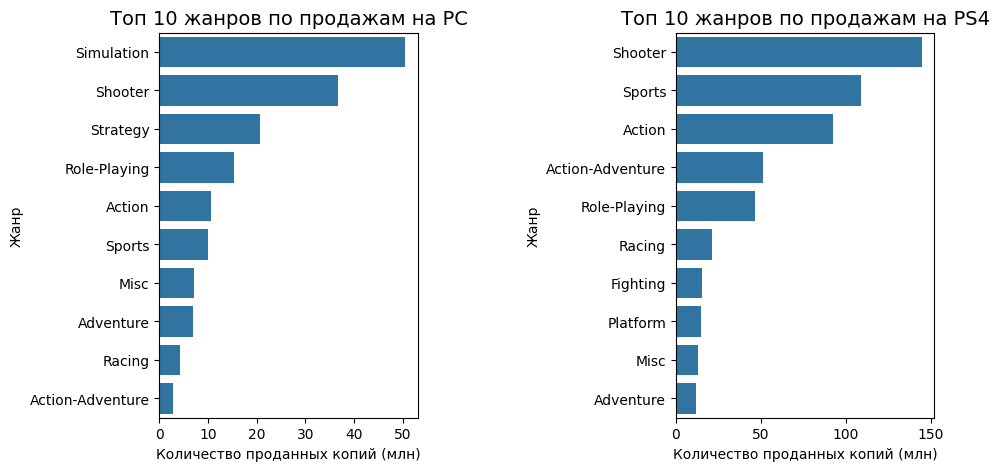

In [ ]:
#5 Сравнение топ 10 жанров (по продажам) на двух рахных платформах (PC and PS4)
data_pc = vgchartz_data[vgchartz_data['console'] == 'PC']
data_ps4 = vgchartz_data[vgchartz_data['console'] == 'PS4']

genres_by_sales_pc = (data_pc.groupby('genre')['total_sales'].sum().sort_values(ascending=False)).head(10).reset_index()
# print(genres_by_sales_pc)

genres_by_sales_ps4 = (data_ps4.groupby('genre')['total_sales'].sum().sort_values(ascending=False)).head(10).reset_index()
# print(genres_by_sales_ps4)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(x='total_sales', y='genre', data=genres_by_sales_pc)
plt.title('Топ 10 жанров по продажам на PC', fontsize=14)
plt.ylabel('Жанр', fontsize=10)
plt.xlabel('Количество проданных копий (млн)', fontsize=10)

plt.subplot(1,2,2)
sns.barplot(x='total_sales', y='genre', data=genres_by_sales_ps4)
plt.title('Топ 10 жанров по продажам на PS4', fontsize=14)
plt.ylabel('Жанр', fontsize=10)
plt.xlabel('Количество проданных копий (млн)', fontsize=10)

plt.subplots_adjust(wspace=1)


plt.show()

                                title  total_sales
13724              Grand Theft Auto V        64.29
5266          Call of Duty: Black Ops        30.99
5281   Call of Duty: Modern Warfare 3        30.71
5273       Call of Duty: Black Ops II        29.59
5277             Call of Duty: Ghosts        28.80
5271        Call of Duty: Black Ops 3        26.72
5280   Call of Duty: Modern Warfare 2        25.02
20998                       Minecraft        24.01
13719             Grand Theft Auto IV        22.53
5265   Call of Duty: Advanced Warfare        21.78


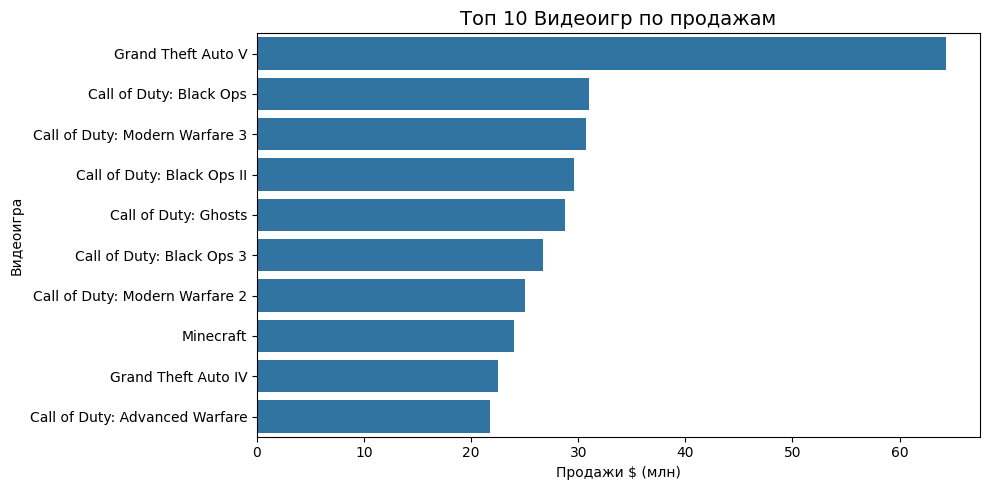

In [ ]:
 #6 Топ-10 самых продаваемых игр
data_game_sales = vgchartz_data.groupby('title', as_index=False)['total_sales'].sum()
data_game_sales = data_game_sales.sort_values(by='total_sales', ascending=False).head(10)
print(data_game_sales)

plt.figure(figsize=(10,5))
sns.barplot(y='title', x='total_sales', data=data_game_sales)
plt.title('Топ 10 Видеоигр по продажам', fontsize=14)
plt.ylabel('Видеоигра', fontsize=10)
plt.xlabel('Количество проданных копий (млн)', fontsize=10)
plt.tight_layout()

plt.show()

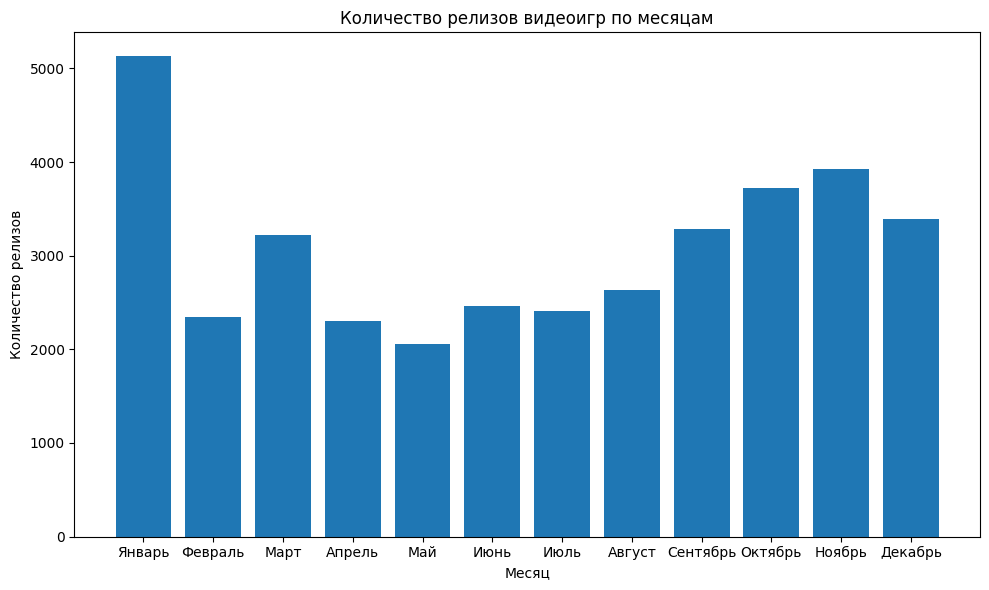

In [ ]:
#7 Кол-во релизов видеоигр по месяца (за все время)
# Правки: не учитывать игры до 2000 г.

data = pd.read_csv('vgchartz-2024.csv')
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

# Удаляем строки с некорректными датами (NaT)
data = data.dropna(subset=['release_date'])

data_game_sales = data.groupby('title', as_index=False).agg(
    total_sales=('total_sales', 'sum'),     
    release_date=('release_date', 'min')      
)

data_game_sales['month'] = data_game_sales['release_date'].dt.month

# Подсчитываем количество релизов по месяцам
monthly_releases = data_game_sales['month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(monthly_releases.index, monthly_releases.values)
plt.xticks(monthly_releases.index, ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'])
plt.xlabel('Месяц')
plt.ylabel('Количество релизов')
plt.title('Количество релизов видеоигр по месяцам')
plt.tight_layout()
plt.show()



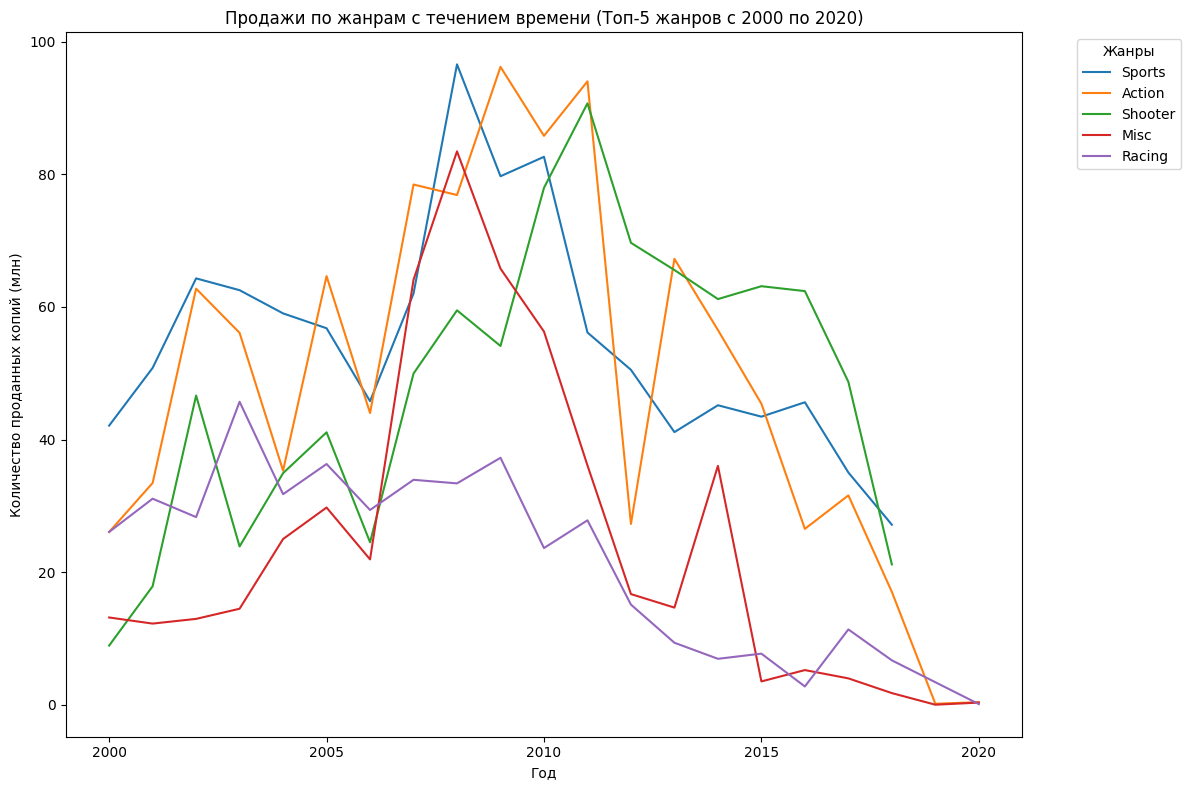

In [ ]:
#8 Продажи по топ-5 жанрам с 2000 по 2020

data = pd.read_csv('vgchartz-2024.csv')

#Приводим данные к корректному формату
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')
data = data.dropna(subset=['release_date'])
data = data[data['total_sales'] > 0]
data['year'] = data['release_date'].dt.year
data = data[data['year'] >= 2000]


total_sales_by_genre = data.groupby('genre', as_index=False)['total_sales'].sum()
top_5_genres = total_sales_by_genre.sort_values(by='total_sales', ascending=False).head(5)
data_top_5_genres = data[data['genre'].isin(top_5_genres['genre'])]
sales_by_genre_year = data_top_5_genres.groupby(['year', 'genre'], as_index=False)['total_sales'].sum()

#График
plt.figure(figsize=(12, 8))
for genre in top_5_genres['genre']:
    genre_data = sales_by_genre_year[sales_by_genre_year['genre'] == genre]
    plt.plot(genre_data['year'], genre_data['total_sales'], label=genre)
plt.xlabel('Год')
plt.ylabel('Количество проданных копий (млн)')
plt.title('Продажи по жанрам с течением времени (Топ-5 жанров с 2000 по 2020)')
plt.legend(title='Жанры', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=range(data['year'].min(), data['year'].max() + 1, 5))
plt.tight_layout()
plt.show()


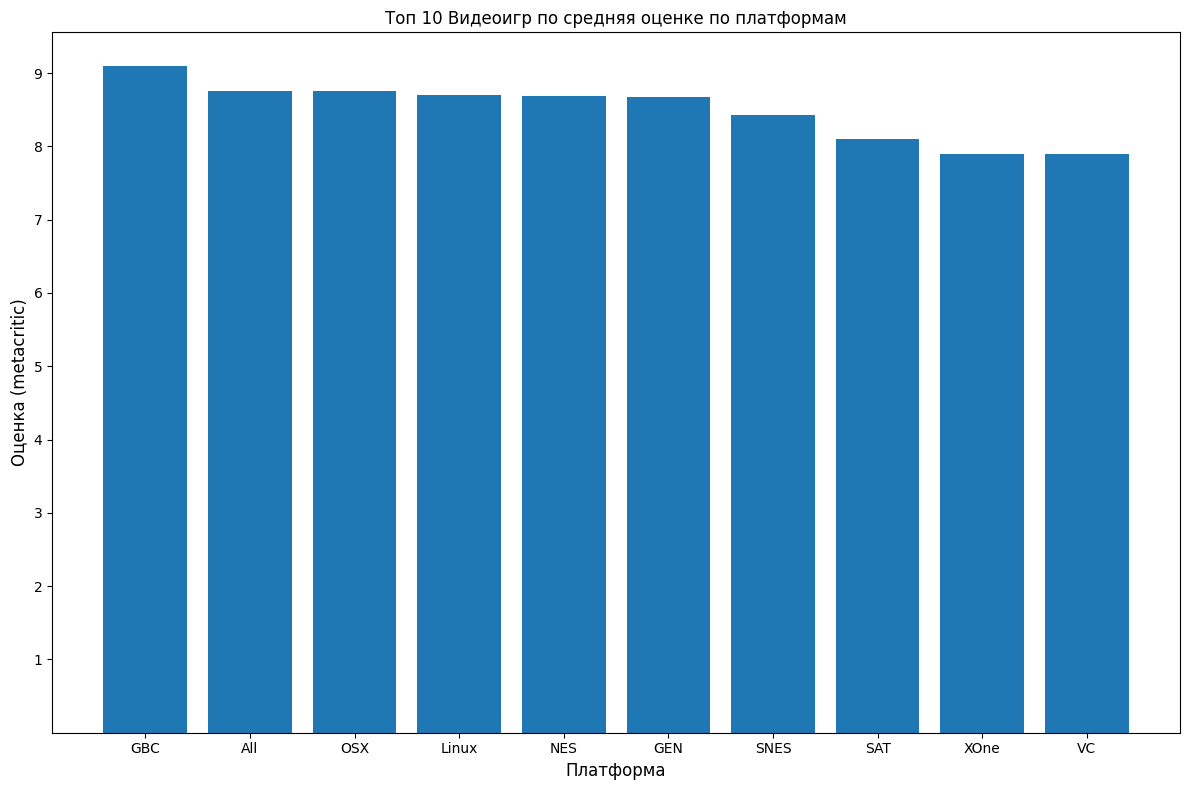

In [ ]:
#9 Топ 10 Видеоигр по средняя оценке по платформам

data = pd.read_csv('vgchartz-2024.csv')

#преобразование значений в critic_score в числовой формат/Nan
data['critic_score'] = pd.to_numeric(data['critic_score'], errors='coerce')
data = data.dropna(subset=['critic_score', 'console'])

average_critic_score = data.groupby('console', as_index=False)['critic_score'].mean()
average_critic_score = average_critic_score.sort_values(by='critic_score', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.bar(average_critic_score['console'], average_critic_score['critic_score'])
plt.xlabel('Платформа',fontsize=12)
plt.ylabel('Оценка (metacritic)', fontsize=12)
plt.yticks(range(1, 10))
plt.title('Топ 10 Видеоигр по средняя оценке по платформам')
plt.tight_layout()

plt.show()


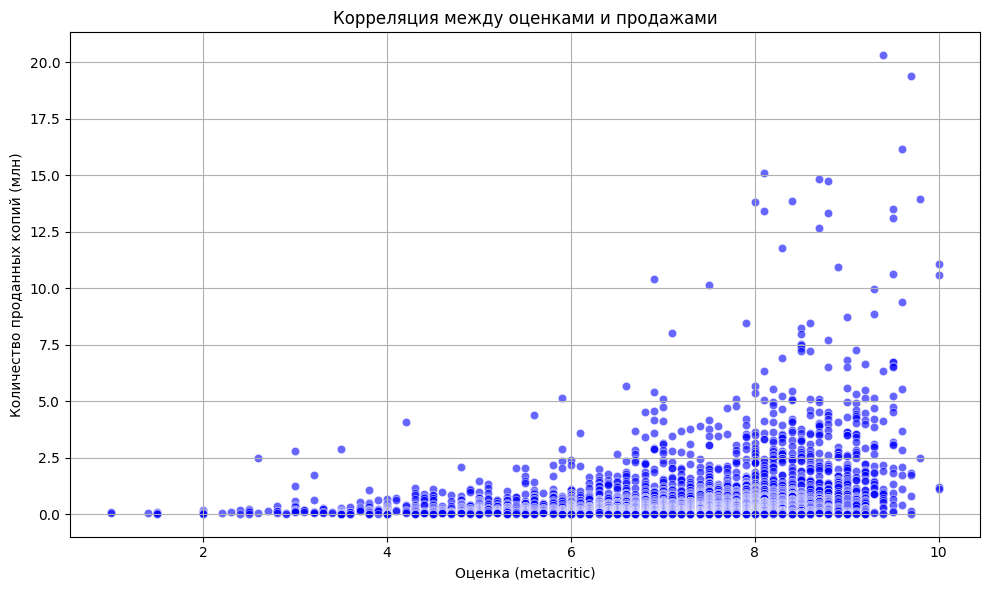

In [ ]:
#10 Корреляция между рейтингом и количеством продаж

filtered_data = data.dropna(subset=['critic_score', 'total_sales'])


plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_data, 
    x='critic_score', 
    y='total_sales', 
    alpha=0.6, 
    color='b'
)


plt.xlabel('Оценка (metacritic)')
plt.ylabel('Количество проданных копий (млн)')
plt.title('Корреляция между оценками и продажами')
plt.grid(True)
plt.tight_layout()
plt.show()



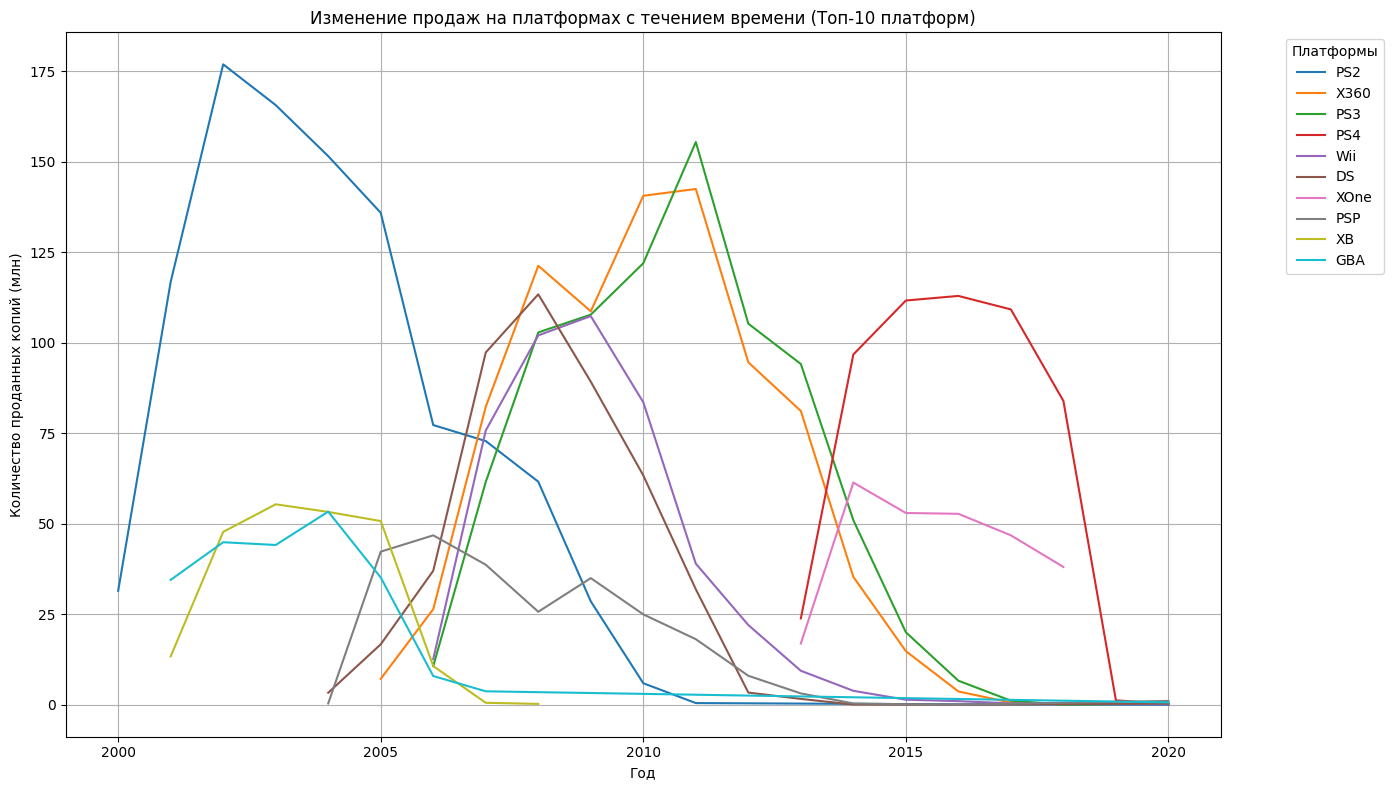

In [ ]:
#11 Количество продаж (млн) топ 10 платформ с течением времени

data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')
data = data.dropna(subset=['release_date'])
data = data[data['total_sales'] > 0]

data['year'] = data['release_date'].dt.year
platform_sales_by_year = data.groupby(['year', 'console'], as_index=False)['total_sales'].sum()

top_platforms = (
    data.groupby('console')['total_sales'].sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)
filtered_data = platform_sales_by_year[platform_sales_by_year['console'].isin(top_platforms)]


plt.figure(figsize=(14, 8))
for platform in top_platforms:
    platform_data = filtered_data[filtered_data['console'] == platform]
    plt.plot(platform_data['year'], platform_data['total_sales'], label=platform)


plt.xlabel('Год')
plt.ylabel('Количество проданных копий (млн)')
plt.title('Количество продаж (млн) топ 10 платформ с течением времени')
plt.legend(title='Платформы', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=range(data['year'].min(), data['year'].max() + 1, 5))
plt.grid(True)
plt.tight_layout()

plt.show()

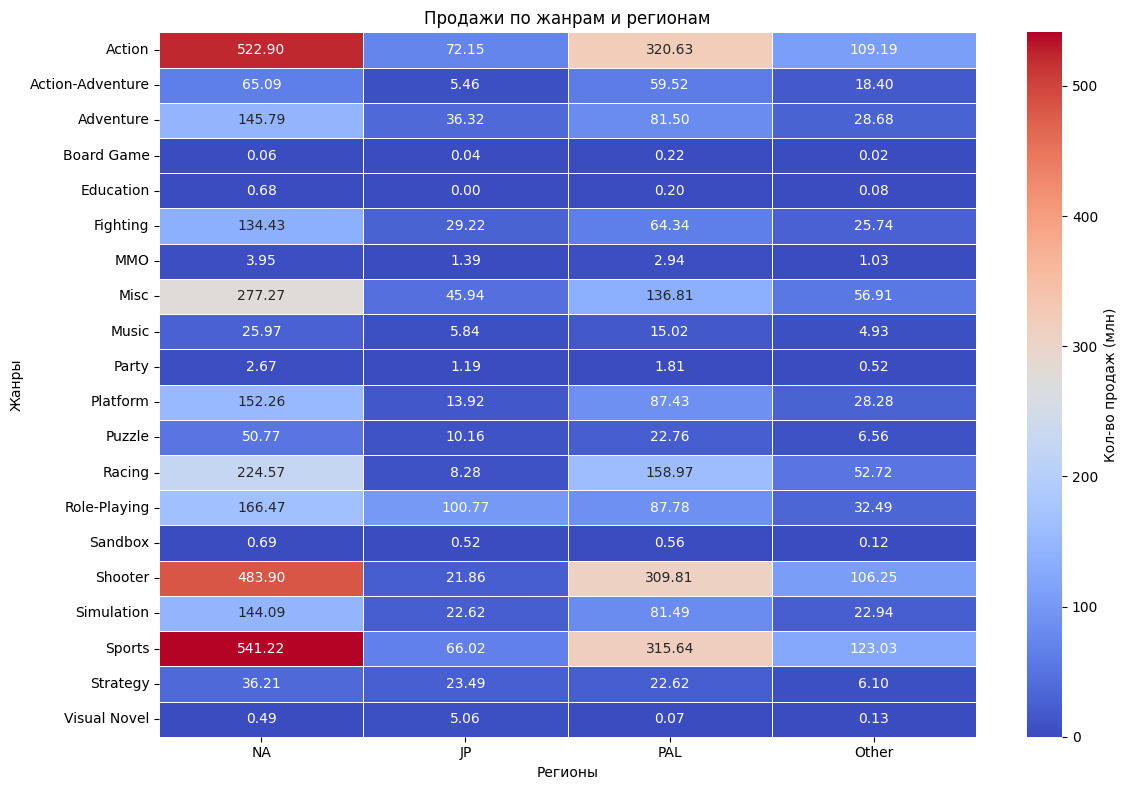

In [ ]:
#12 Продажи по жанрам и регионам (heatmap)

data = data[data['total_sales'] > 0]

columns_of_interest = ['genre', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']
sales_by_region = data[columns_of_interest]

sales_by_genre_region = sales_by_region.groupby('genre', as_index=False).sum()
sales_heatmap_data = sales_by_genre_region.set_index('genre')

region_labels = ['NA', 'JP', 'PAL', 'Other']

plt.figure(figsize=(12, 8))
sns.heatmap(
    sales_heatmap_data,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    xticklabels=region_labels,
    cbar_kws={'label': 'Кол-во продаж (млн)'}
    
)

plt.title('Продажи по жанрам и регионам')
plt.xlabel('Регионы')
plt.ylabel('Жанры')
plt.tight_layout()

plt.show()

/var/folders/ww/jl70sxb157j8dtjgp9l6xcy00000gn/T/ipykernel_45789/3623886652.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('Set2').colors[:5]


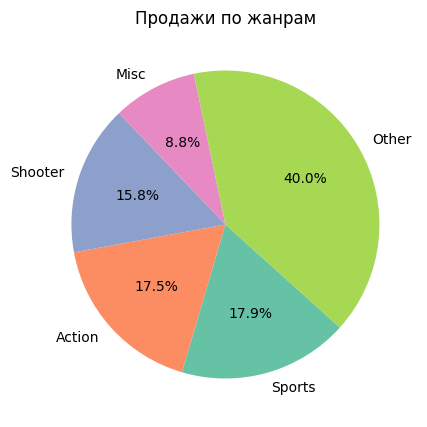

In [ ]:
#13 Продажи по жанрам (piechart)

#группируем по жанрам и суммируем продажи
sales_by_genre = data.groupby('genre')['total_sales'].sum().reset_index()
sales_by_genre = sales_by_genre.sort_values(by='total_sales', ascending=False)

top_genres = sales_by_genre.head(4)
other_sales = sales_by_genre['total_sales'].iloc[4:].sum()
top_genres = pd.concat([top_genres, pd.DataFrame({'genre': ['Other'], 'total_sales': [other_sales]})])

colors = cm.get_cmap('Set2').colors[:5] 
plt.figure(figsize=(5, 5))
plt.pie(top_genres['total_sales'], labels=top_genres['genre'], autopct='%1.1f%%', startangle=-42, counterclock=False, colors=colors)
plt.title('Продажи по жанрам')
plt.show()

1. Парный график (Pairplot) 

Идея: Исследовать корреляцию между несколькими числовыми столбцами, например:
	•	critic_score, total_sales, na_sales, jp_sales.
2. Гистограмма с областями (Stacked Area Chart)

Идея: Показать, как менялись продажи по регионам (например, na_sales, jp_sales) с течением времени.
Пример:
	•	По оси X: годы.
	•	По оси Y: суммарные продажи.
	•	Области для каждого региона.
3. Трекбальная диаграмма (Bubble Chart)

Идея: Отобразить популярность игр по жанрам.
Пример:
	•	Оси: critic_score и total_sales.
	•	Размер точки: количество игр в жанре.
	•	Цвет: жанр.
4. Санки-диаграмма (Sankey Diagram)

Идея: Показать распределение игр от издателей к жанрам и консолям.
	•	Узлы: издатели → жанры → платформы.
	•	Потоки: количество игр.
5. Воронка (Funnel Chart)

Идея: Показать воронку критического рейтинга:
	•	Сколько игр имеют рейтинг выше 50, 70, 90 и т.д.**

In [ ]:
#Pairplot

# columns_to_plot = ['critic_score', 'total_sales', 'na_sales', 'jp_sales']
# sns.pairplot(data[columns_to_plot])
# plt.show()

In [ ]:
# Продажи по регионам с течением времени НЕ ИСПОЛЬЗУЕТСЯ

data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')
data['year'] = data['release_date'].dt.year
data = data[data['year'] >= 2000]
sales_by_year_region = data.groupby('year')[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum()
sales_by_year_region = sales_by_year_region[sales_by_year_region.sum(axis=1) > 0]

plt.figure(figsize=(12, 8))
plt.stackplot(sales_by_year_region.index, 
              sales_by_year_region['na_sales'], 
              sales_by_year_region['jp_sales'], 
              sales_by_year_region['pal_sales'], 
              sales_by_year_region['other_sales'],
              labels=['NA Sales', 'JP Sales', 'PAL Sales', 'Other Sales'], 
              alpha=0.6)

plt.xlabel('Год')
plt.ylabel('Продажи (миллионы)')
plt.title('Продажи по регионам с течением времени')
years = range(2000, sales_by_year_region.index.max() + 1, 5)
plt.xticks(years)
plt.legend(title='Регионы', loc='upper left')
plt.tight_layout()
plt.show()



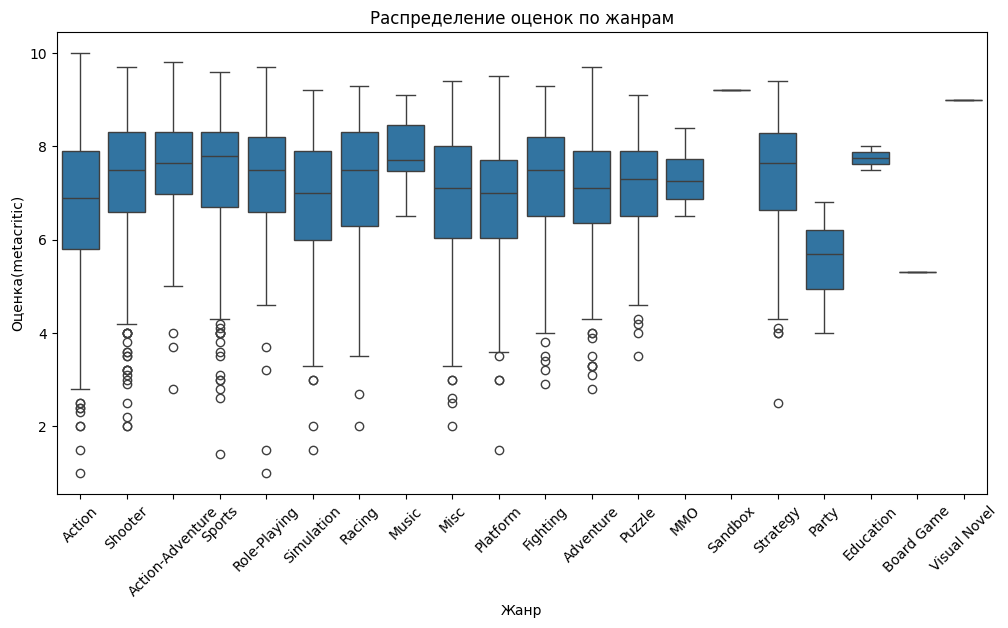

In [ ]:
#14 Распределение оценок по жанрам

plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='critic_score', data=data)

plt.xlabel('Жанр')
plt.ylabel('Оценка(metacritic)')
plt.title('Распределение оценок по жанрам')

plt.xticks(rotation=45)
plt.show()

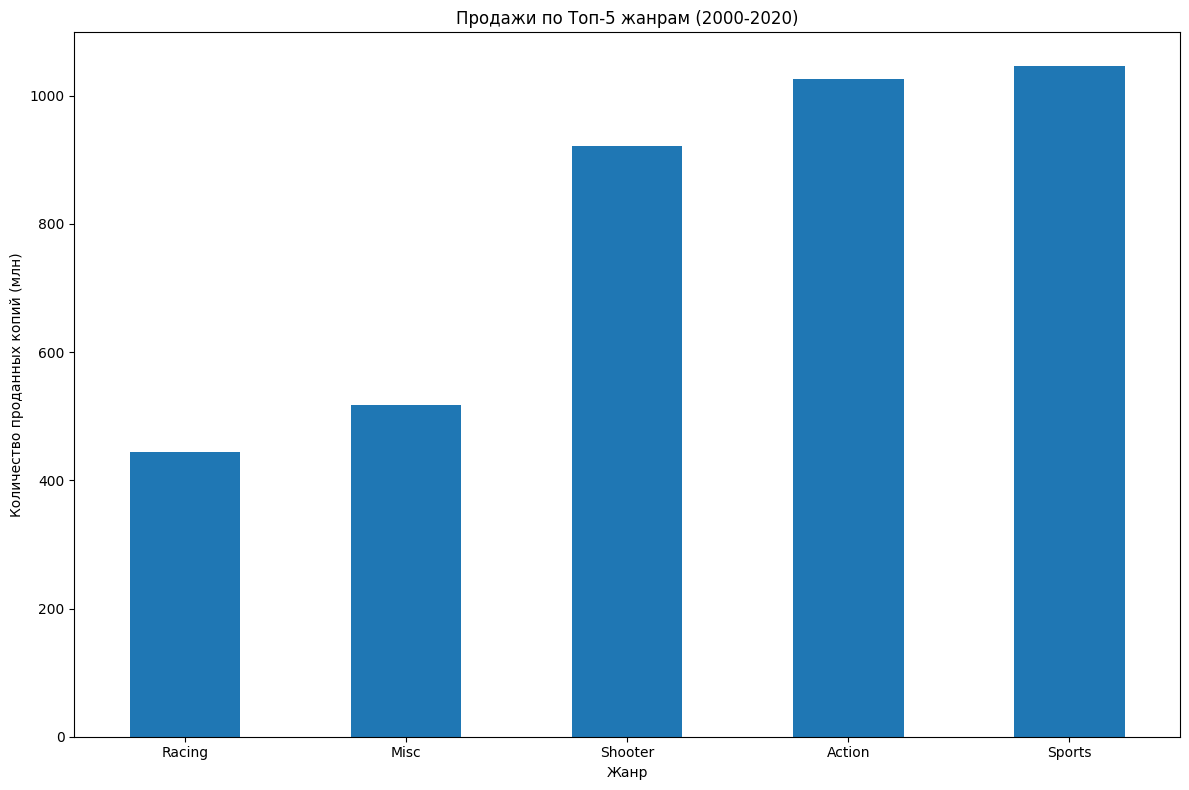

In [ ]:
#15 Продажи по Топ-5 жанрам (2000-2020) (Barplot)

data_filtered = data[(data['release_date'].dt.year >= 2000) & (data['release_date'].dt.year <= 2020)]

#Суммируем продажи для жанров
sales_by_genre = data_filtered.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
top_5_genres = sales_by_genre.head(5)

top_5_genres = top_5_genres[::-1]

plt.figure(figsize=(12, 8))
top_5_genres.plot(kind='bar')
plt.title('Продажи по Топ-5 жанрам (2000-2020)')
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий (млн)')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

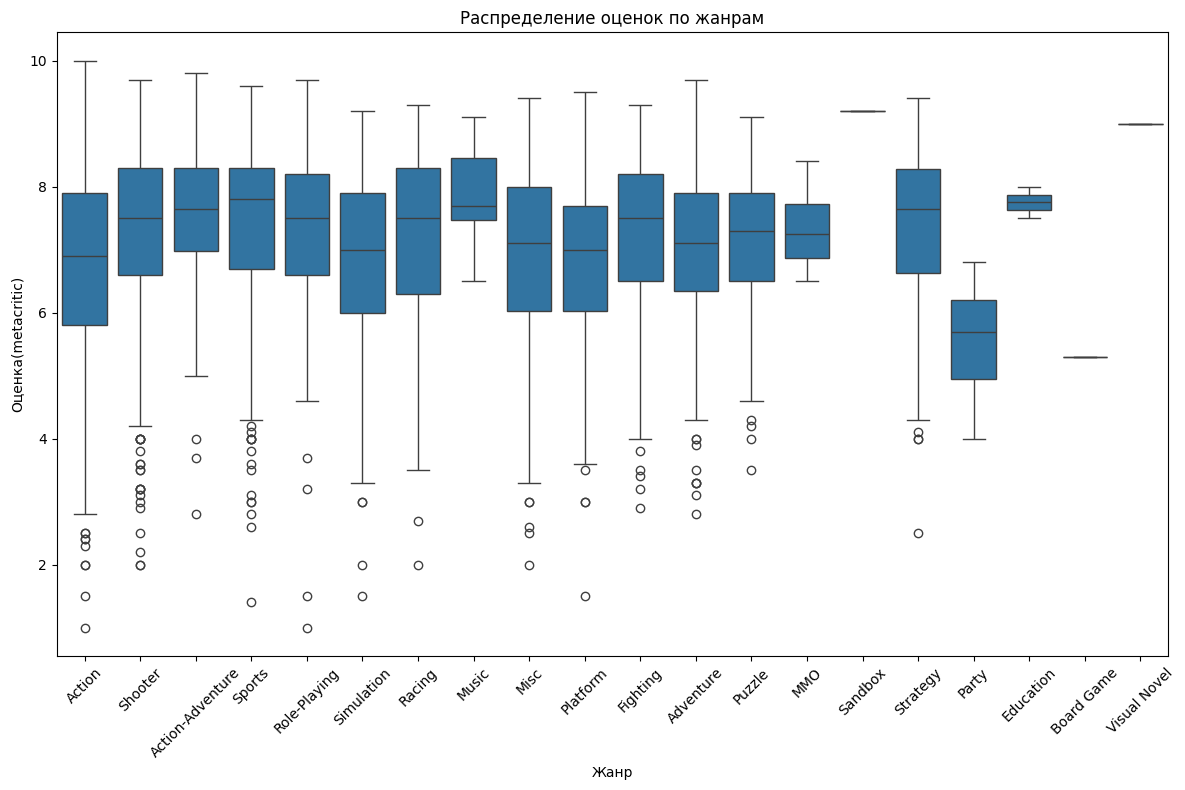

In [ ]:
#16 Распределение критических оценок по жанрам(Boxplot)

plt.figure(figsize=(12, 8))
sns.boxplot(x='genre', y='critic_score', data=data)

plt.title('Распределение оценок по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Оценка(metacritic)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()